In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [70]:
dtype_spec = {
    'MovieID': int,
    'Title': str
}

# MovieID::Title::Genres
movies_df = pd.read_csv('movies.dat', sep='::', engine='python', header=None, 
                        names=['MovieID', 'Title', 'Genres'],
                        dtype=dtype_spec)

# split Genres by '|'
movies_df['Genres'] = movies_df['Genres'].apply(lambda x: x.split('|'))
movies_df['Year'] = movies_df['Title'].apply(lambda x: int(x[-5:-1]) if x[-5:-1].isdigit() else -1)
print(movies_df.head())

   MovieID                               Title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              Genres  Year  
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995  
1                     [Adventure, Children, Fantasy]  1995  
2                                  [Comedy, Romance]  1995  
3                           [Comedy, Drama, Romance]  1995  
4                                           [Comedy]  1995  


In [60]:
dtype_spec = {
    'UserID': int,
    'MovieID': int,
    'Rating': float
}

# UserID::MovieID::Rating::Timestamp
ratings_df = pd.read_csv('ratings.dat', sep='::', engine='python', 
                         names=['UserID', 'MovieID', 'Rating', 'Timestamp'], 
                         dtype=dtype_spec)

# convert Timestamp to datetime
ratings_df['Timestamp'] = pd.to_datetime(ratings_df['Timestamp'], unit='s')

print(ratings_df.head())


   UserID  MovieID  Rating           Timestamp
0       1      122     5.0 1996-08-02 11:24:06
1       1      185     5.0 1996-08-02 10:58:45
2       1      231     5.0 1996-08-02 10:56:32
3       1      292     5.0 1996-08-02 10:57:01
4       1      316     5.0 1996-08-02 10:56:32


In [61]:
dtype_spec = {
    'UserID': int,
    'MovieID': int,
    'Tag': str,
}

# UserID::MovieID::Tag::Timestamp
tags_df = pd.read_csv('tags.dat', sep='::', engine='python', 
                         names=['UserID', 'MovieID', 'Tag', 'Timestamp'], 
                         dtype=dtype_spec)

# convert Timestamp to datetime
tags_df['Timestamp'] = pd.to_datetime(ratings_df['Timestamp'], unit='s')

print(tags_df.head())


   UserID  MovieID              Tag           Timestamp
0      15     4973       excellent! 1996-08-02 11:24:06
1      20     1747         politics 1996-08-02 10:58:45
2      20     1747           satire 1996-08-02 10:56:32
3      20     2424  chick flick 212 1996-08-02 10:57:01
4      20     2424            hanks 1996-08-02 10:56:32


In [62]:
print('Movie: Num =', len(movies_df))
print('Ratings: Num =', len(ratings_df))
print('Tags: Num =', len(tags_df))
ori_movies_df = movies_df.copy()

Movie: Num = 10681
Ratings: Num = 10000054
Tags: Num = 95580


In [63]:
genres = {'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
          'Thriller', 'War', 'Western'}

movies_df = ori_movies_df.copy()
movies_df['NonStandardGenres'] = movies_df['Genres'].apply(lambda x: [genre for genre in x if genre not in genres])

non_standard_genres_movies = movies_df[movies_df['NonStandardGenres'].apply(len) > 0].drop('Genres', axis=1)
print(non_standard_genres_movies.head())
print('Num of non-standard genres movies:', len(non_standard_genres_movies))
# remove non-standard genres from movies_df['Genres']
movies_df = movies_df.assign(Genres=lambda df: df['Genres'].apply(lambda x: [genre for genre in x if genre in genres])).drop('NonStandardGenres', axis=1)


      MovieID                          Title NonStandardGenres
32         33        Wings of Courage (1995)            [IMAX]
36         37  Across the Sea of Time (1995)            [IMAX]
1724     1797                 Everest (1998)            [IMAX]
3074     3159           Fantasia 2000 (1999)            [IMAX]
4289     4382                  Wolves (1999)            [IMAX]
Num of non-standard genres movies: 30


Text(0.5, 1.0, 'Percentage of Movies by Genre')

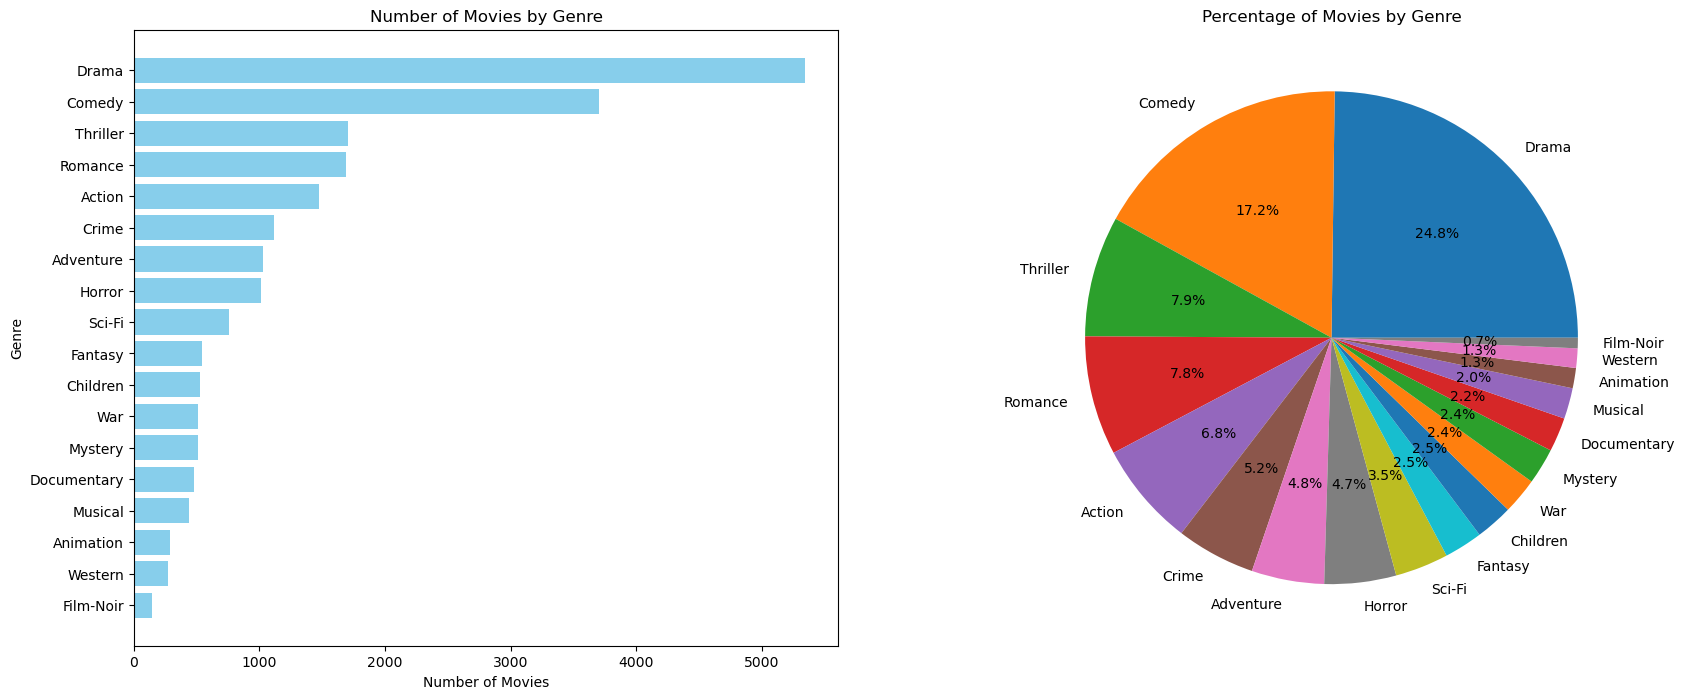

In [64]:
from collections import Counter
genre_counts = Counter([genre for genres in movies_df['Genres'] for genre in genres])
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(20, 8))

# bar chart
plt.subplot(1, 2, 1)
plt.barh(genre_counts_df['Genre'], genre_counts_df['Count'], color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Number of Movies by Genre')
plt.gca().invert_yaxis()

# pie chart
plt.subplot(1, 2, 2)
plt.pie(genre_counts_df['Count'], labels=genre_counts_df['Genre'], autopct='%1.1f%%')
plt.title('Percentage of Movies by Genre')

In [65]:
ratings_df['Year'] = pd.to_datetime(ratings_df['Timestamp'], unit='s').dt.year
yearly_review_count = ratings_df.groupby('Year')['Rating'].count().reset_index()
print(yearly_review_count)
# Remove ratings with year 1995 and 2009, as they are too few
ratings_df = ratings_df[~ratings_df['Year'].isin([1995, 2009])]

    Year   Rating
0   1995        3
1   1996  1047618
2   1997   459947
3   1998   202092
4   1999   788793
5   2000  1271623
6   2001   759141
7   2002   583409
8   2003   688694
9   2004   768168
10  2005  1177283
11  2006   765733
12  2007   699325
13  2008   773617
14  2009    14608


Text(0.5, 1.0, 'Rating Distribution by Genre')

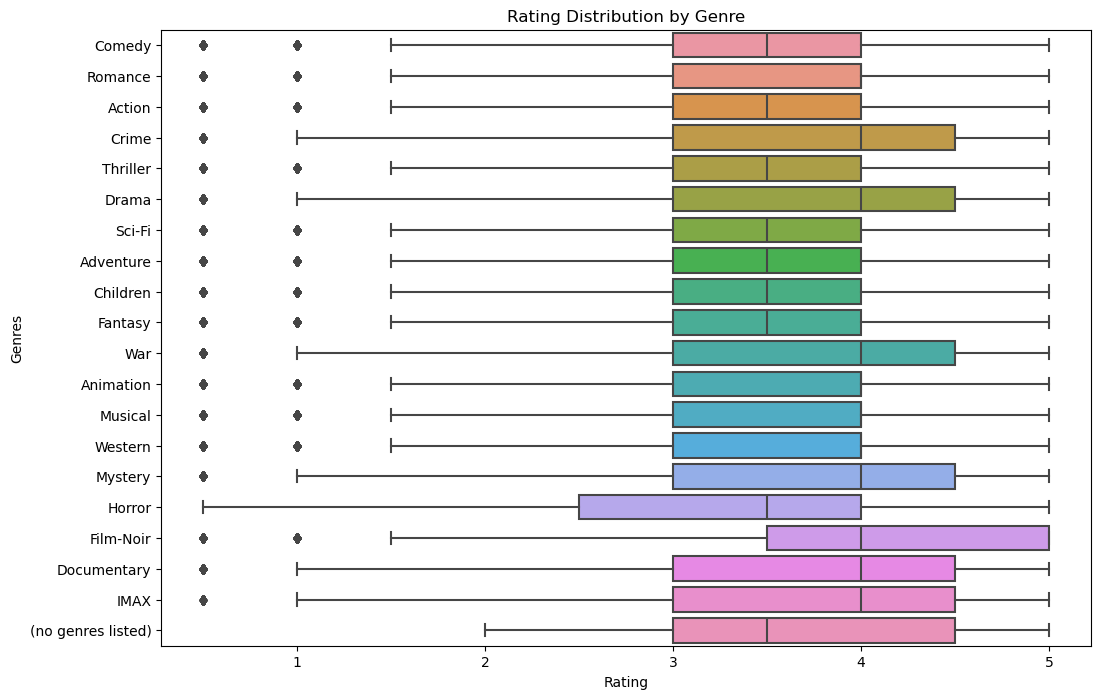

In [72]:
movies_df_exploded = movies_df.explode('Genres')
merged_df = pd.merge(ratings_df, movies_df_exploded, on='MovieID')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Rating', y='Genres', data=merged_df)

 plt.title('Rating Distribution by Genre')

KeyError: 'Count'

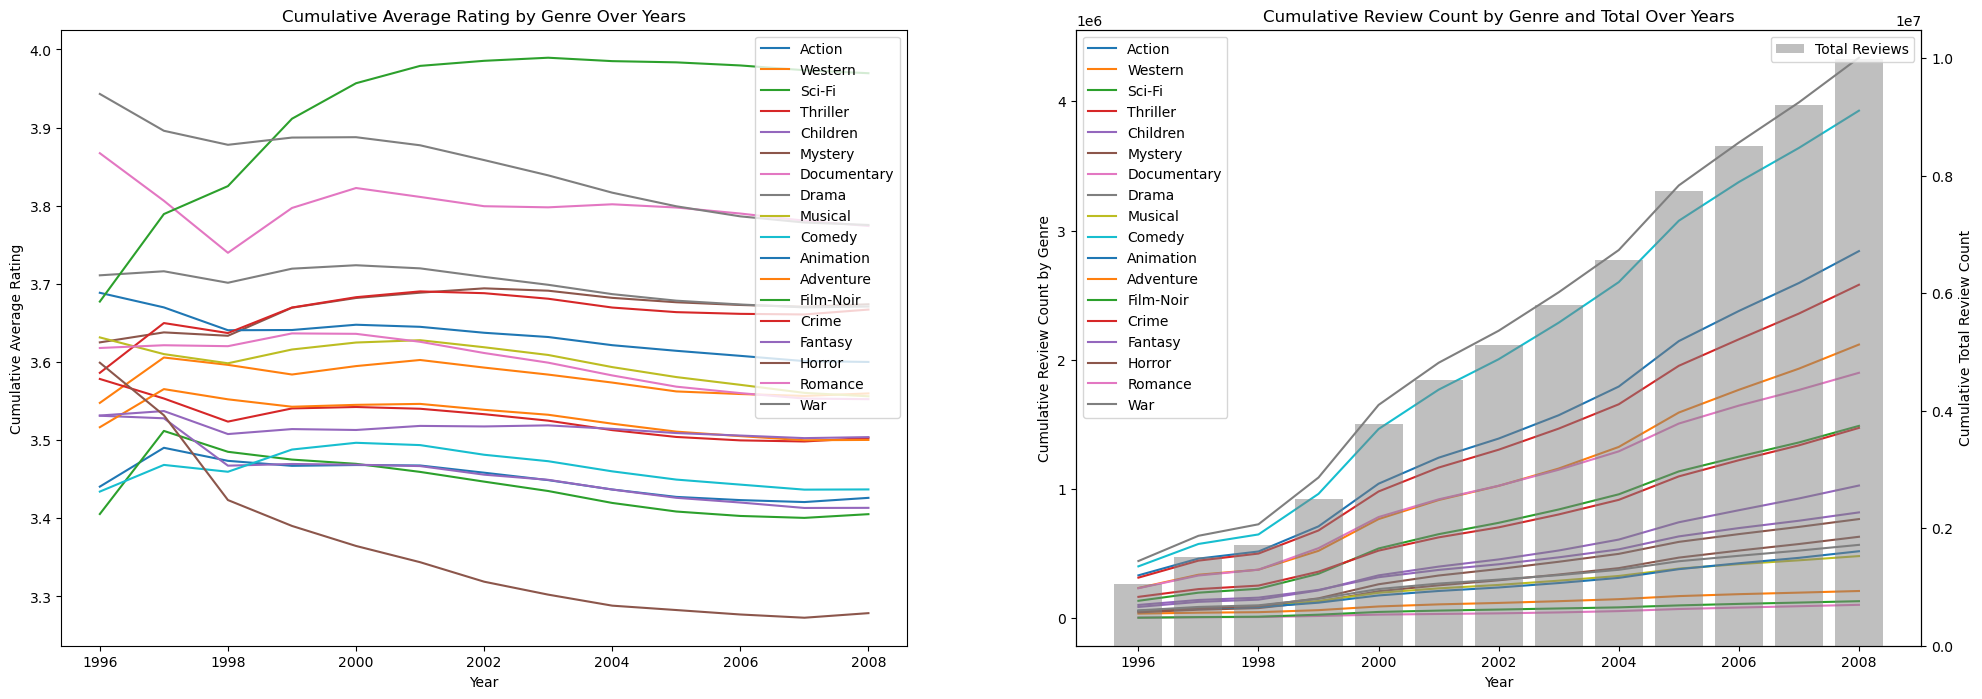

In [67]:
movies_df_exploded = movies_df.explode('Genres')
merged_df = pd.merge(ratings_df, movies_df_exploded, on='MovieID')

# 对合并后的数据集按genre和年份分组，计算每组的平均评分
average_ratings_per_year = merged_df.groupby(['Genres', 'Year'])['Rating'].mean().reset_index()

# 计算从第一年到每一年的每个genre的累积平均评分
average_ratings_per_year['Cumulative Average Rating'] = average_ratings_per_year.groupby('Genres')['Rating'].apply(lambda x: x.expanding().mean()).reset_index(level=0, drop=True)

# 同时，计算每个genre每年的评价数量
average_ratings_per_year['Yearly Review Count'] = merged_df.groupby(['Genres', 'Year'])['Rating'].count().reset_index(drop=True)

# 计算每个genre每年累计的评价数量
average_ratings_per_year['Cumulative Review Count'] = average_ratings_per_year.groupby('Genres')['Yearly Review Count'].cumsum()

# 根据需要，重新排列列的顺序
average_ratings_per_year = average_ratings_per_year[['Genres', 'Year', 'Rating', 'Cumulative Average Rating', 'Yearly Review Count', 'Cumulative Review Count']]

# 统计每年的评分个数
yearly_review_count = ratings_df.groupby('Year')['Rating'].count().reset_index()

# 计算累计评分个数
yearly_review_count['Cumulative Review Count'] = yearly_review_count['Rating'].cumsum()

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
for genre in genres:
    genre_data = average_ratings_per_year[average_ratings_per_year['Genres'] == genre]
    plt.plot(genre_data['Year'], genre_data['Cumulative Average Rating'], label=genre)

plt.xlabel('Year')
plt.ylabel('Cumulative Average Rating')
plt.title('Cumulative Average Rating by Genre Over Years')
plt.legend()

plt.subplot(1, 2, 2)
# 创建第一个Y轴，用于绘制折线图
ax1 = plt.gca()  # 获取当前轴
for genre in genres:
    genre_data = average_ratings_per_year[average_ratings_per_year['Genres'] == genre]
    ax1.plot(genre_data['Year'], genre_data['Cumulative Review Count'], label=genre)

ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Review Count by Genre')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 创建第二个Y轴，用于绘制柱状图
ax2 = ax1.twinx()  # 创建共享X轴的第二个Y轴
ax2.bar(yearly_review_count['Year'], yearly_review_count['Cumulative Review Count'], color='grey', alpha=0.5, label='Total Reviews')
ax2.set_ylabel('Cumulative Total Review Count')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Cumulative Review Count by Genre and Total Over Years')
plt.show()



In [68]:
ratings_df.describe()

,UserID,MovieID,Rating,Timestamp,Year
count,9.985443e+06,9.985443e+06,9.985443e+06,9985443,9.985443e+06
mean,3.584142e+04,4.103963e+03,3.512502e+00,2002-09-18 02:30:28.374703744,2.002190e+03
min,1.000000e+00,1.000000e+00,5.000000e-01,1996-01-29 00:00:00,1.996000e+03
25%,1.809600e+04,6.480000e+02,3.000000e+00,1999-12-31 08:58:31.500000,1.999000e+03
50%,3.569200e+04,1.831000e+03,4.000000e+00,2002-10-19 23:21:20,2.002000e+03
75%,5.354500e+04,3.623000e+03,4.000000e+00,2005-09-08 08:30:27,2.005000e+03
max,7.156700e+04,6.508800e+04,5.000000e+00,2008-12-31 23:45:47,2.008000e+03
std,2.057894e+04,8.897498e+03,1.060500e+00,NaN,3.703687e+00
